### Exploración y predicción del dataset Infartos

Hacemos las importaciones de librerias

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Cargamos el dataset de Infartos y imprimimos los primeros 5 elementos

In [12]:
# Cargar los datos
df = pd.read_csv('infartos.csv')

df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


Como podemos observar Result es "positive" o "negative", por lo que vamos a asignarle un valor como 0 a negative y 1 a positive

In [13]:
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])
df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


Haciendo una lectura de los datos no tenemos muchos datos con 0 por lo que tomaremos como punto de inicio el dataset completo para realizar cada una de las partes correspondientes

In [14]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Result', axis=1)
y = df['Result']

Vamos a visualizar un plot que nos muestre las clases

c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


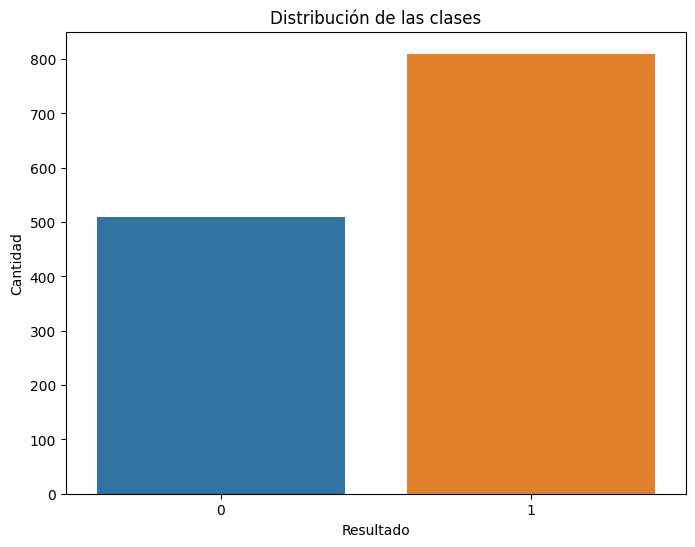

In [15]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.show()

Los resultados nos muestran que existen casi el doble de datos que si son posibles de poseer un infarto

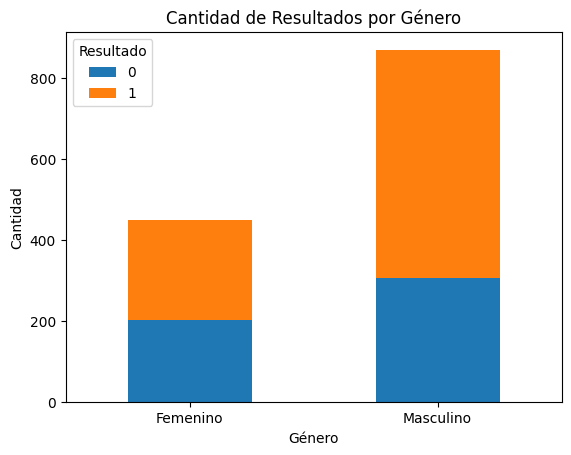

In [16]:
# Contar la cantidad de resultados por género
result_counts = df.groupby('Gender')['Result'].value_counts().unstack()

# Graficar
result_counts.plot(kind='bar', stacked=True)
plt.title('Cantidad de Resultados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Femenino', 'Masculino'], rotation=0)
plt.legend(title='Resultado')
plt.show()

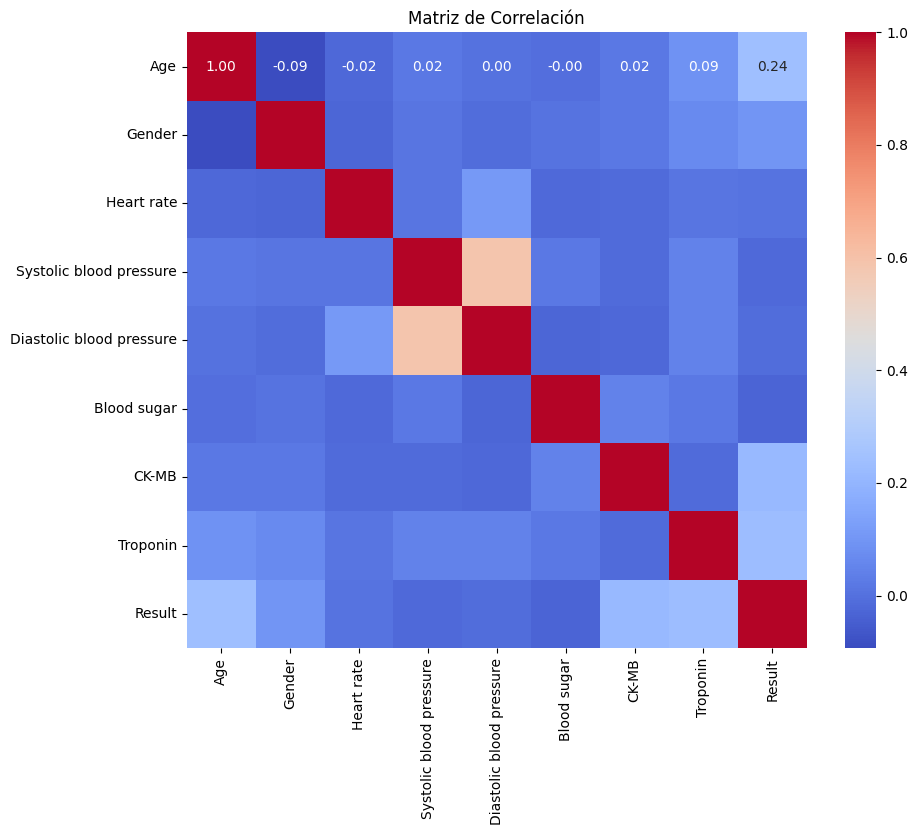

In [21]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Obtenemos el train y el test data

In [45]:
# Separar las muestras de cada clase
positive_samples = df[df['Result'] == 1]
negative_samples = df[df['Result'] == 0]

# Seleccionar una cantidad igual de muestras de cada clase
min_samples = min(len(positive_samples), len(negative_samples))
balanced_samples = pd.concat([positive_samples.head(min_samples), negative_samples.head(min_samples)])

# Dividir los datos balanceados en características (X) y etiquetas (y)
X_balanced = balanced_samples.drop('Result', axis=1)
y_balanced = balanced_samples['Result']

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Normalizar características utilizando la media
scaler = StandardScaler(with_mean=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Regresión Logistica

In [46]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8431372549019608
Precision: 0.872093023255814
Recall: 0.78125


### KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.7598039215686274
Precision: 0.8405797101449275
Recall: 0.6041666666666666


### Redes Neuronales

In [48]:
# Hiperparámetros
hidden_layer_sizes = (100, 100, 100)
batch_size = 64
learning_rate_init = 0.001
max_iter = 10
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8284313725490197
Precision: 0.8588235294117647
Recall: 0.7604166666666666


c:\Users\rolbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
